In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

train = pd.read_csv("train_res.csv")
X_train = train.drop("Class", axis=1)
y_train = train["Class"]


test = pd.read_csv("test_set.csv")
X_test = test.drop("Class", axis=1)
y_test = test["Class"]


In [3]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]


In [6]:
print("Logistic Regression Metrics:")
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_lr))

Logistic Regression Metrics:
Precision: 0.058027079303675046
Recall: 0.9183673469387755
F1-score: 0.1091570648878108
AUC-ROC: 0.9698631105509169


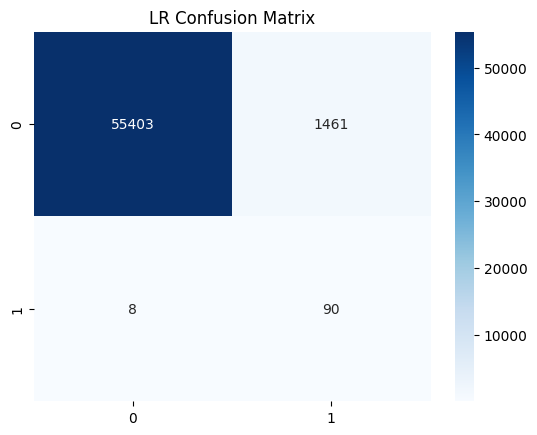

In [5]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("LR Confusion Matrix")
plt.show()


In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]


print("Random Forest Metrics:")
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_rf))


Random Forest Metrics:
Precision: 0.845360824742268
Recall: 0.8367346938775511
F1-score: 0.841025641025641
AUC-ROC: 0.9731024901519414


In [8]:
xgb_model = xgb.XGBClassifier(
    n_estimators=200, max_depth=5, learning_rate=0.1, 
    random_state=42, use_label_encoder=False, eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

print("XGBoost Metrics:")
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_prob_xgb))


C:\Users\surya\Desktop\sample_project_1\env\lib\site-packages\xgboost\training.py:183: UserWarning: [17:10:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Metrics:
Precision: 0.45989304812834225
Recall: 0.8775510204081632
F1-score: 0.6035087719298246
AUC-ROC: 0.9801059527637729


In [10]:
import joblib
joblib.dump(xgb_model, "xgb_fraud_model.pkl")


['xgb_fraud_model.pkl']

In [11]:
joblib.dump(rf, "rf_fraud_model.pkl")

['rf_fraud_model.pkl']